In [1]:
using DataFrames
using CSV
using Plots

In [21]:
xname = "frequency"
yname = "dt_earliest_pickup"

df = DataFrame(CSV.File("results.csv"))

x, y = df[!,xname], df[!,yname]
y = reshape(y, length(unique(x)), length(unique(y)))
x = reshape(x, length(unique(x)), length(unique(y)))
y = y[1, :]/450
x = x[:,1]
#y = unique(y)

ks = names(df)
filter!(e->e!= xname, ks)
filter!(e->e!= yname, ks)

plotly()


Plots.PlotlyBackend()

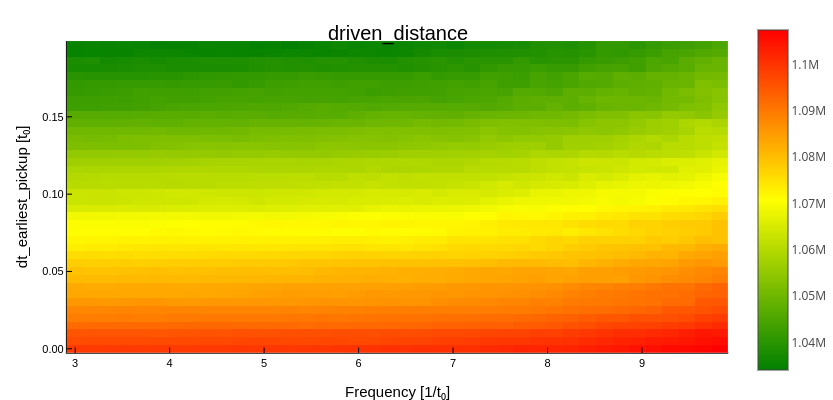

(40, 40)
(

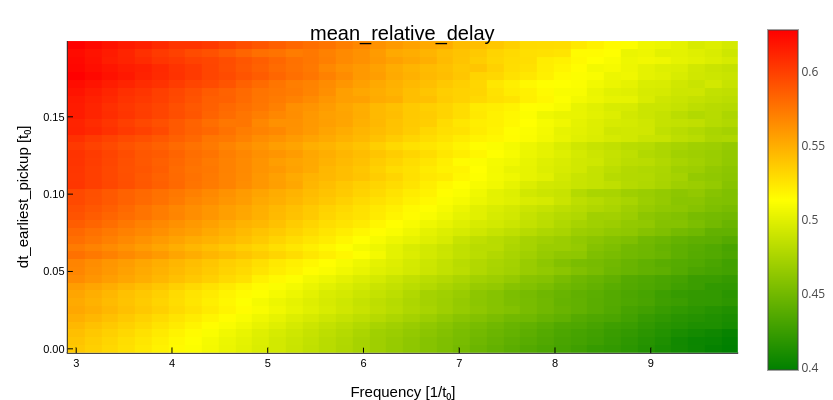

40, 40)


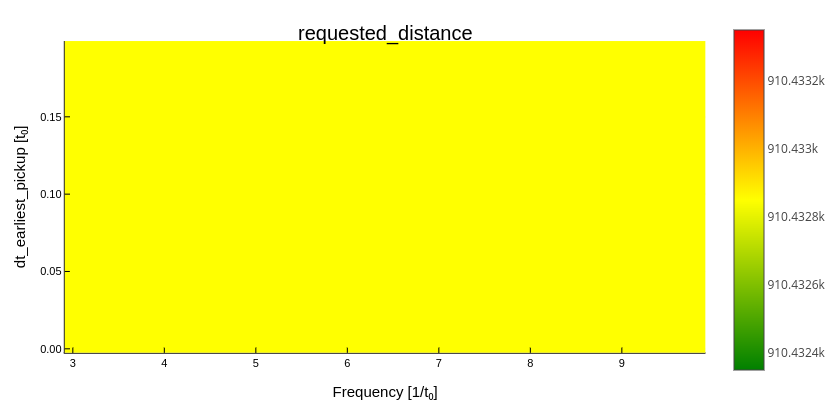

(40, 40)
(

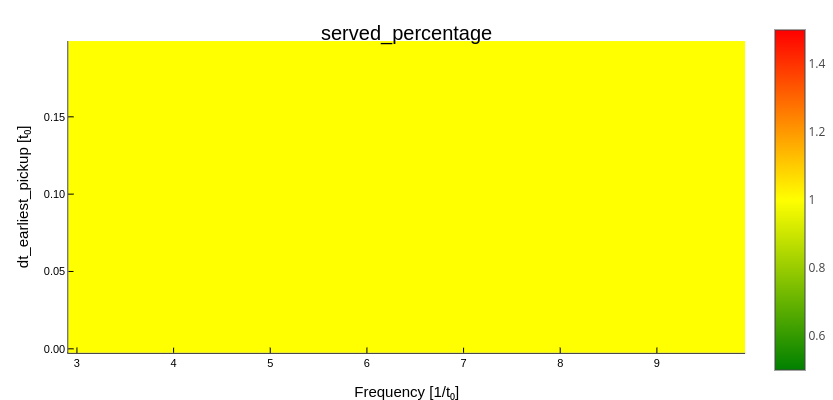

40, 40)


In [23]:
for name in ks
    data = df[!,name]
    data = reshape(data, length(x), length(y))
    for i  in 1:40
        data[i,:] = data[i,:] #
    end
    println(size(data))
    map = heatmap(
    x, y, data,
    c=cgrad([:green, :yellow, :red]),
    xlabel="Frequency [1/t₀]", ylabel="dt_earliest_pickup [t₀]",
    title="$name")
    display(map)
    #savefig(map, "results/$name.png")
end

#TODO Waiting Time, Efficiency

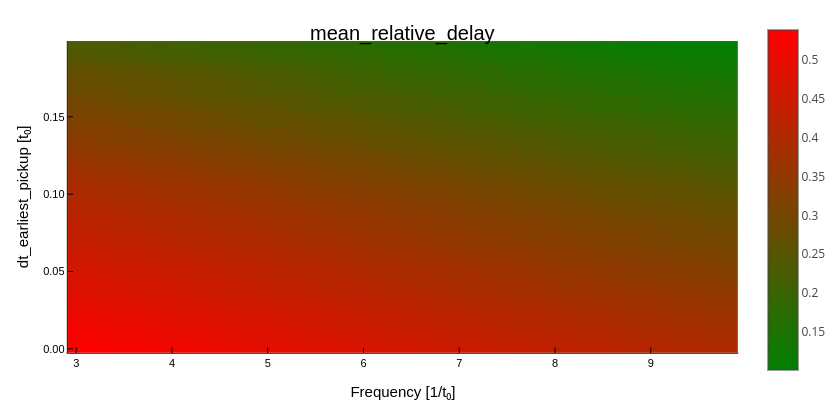

(40, 40)


In [19]:
name = "mean_relative_delay"
data = df[!,name]
    data = reshape(data, length(x), length(y))
    for i  in 1:40
        data[i,:] = data[i,:] .- y[i]
    end
    println(size(data))
    map = heatmap(
    x, y, data,
    c=cgrad([:green, :red]),
    xlabel="Frequency [1/t₀]", ylabel="dt_earliest_pickup [t₀]",
    title="$name")
    display(map)
    #savefig(map, "results/$name.png")